## Histogram
- Zobrazuje frekvenci či počet pozorování v různých pevně stanovených rozmezích, tzv. binech.
- Umožňuje odhalovat a analyzovat vrcholy a asimetrie v datech.
- Osa X zobrazuje jednotlivá rozmezí, na ose y počet / frekvenci pozorování.
- Pokud nejsou biny nastaveny správně, může být zavádějící. Při definici binů lze použít Freedman-Diaconsovo pravidlo snažící se zohledňovat rozptyl dat a brát v potaz velikost vzorku.

Vzorec Freedman-Diaconisovo pravidlo

$$
\text{Bin width} = 2 \times \frac{\text{IQR}}{n^{1/3}}
$$
$$
\begin{align*}
\text{Bin width} & \text{ : Šířka jednotlivých binů v histogramu.} \\
\text{IQR} & \text{ : Mezíkvartilový rozsah datové sady, což je rozdíl mezi 75. a 25. percentil.} \\
n & \text{ : Velikost vzorku.} \\
n^{1/3} & \text{ : Třetí odmocnina z velikosti vzorku.}
\end{align*}
$$




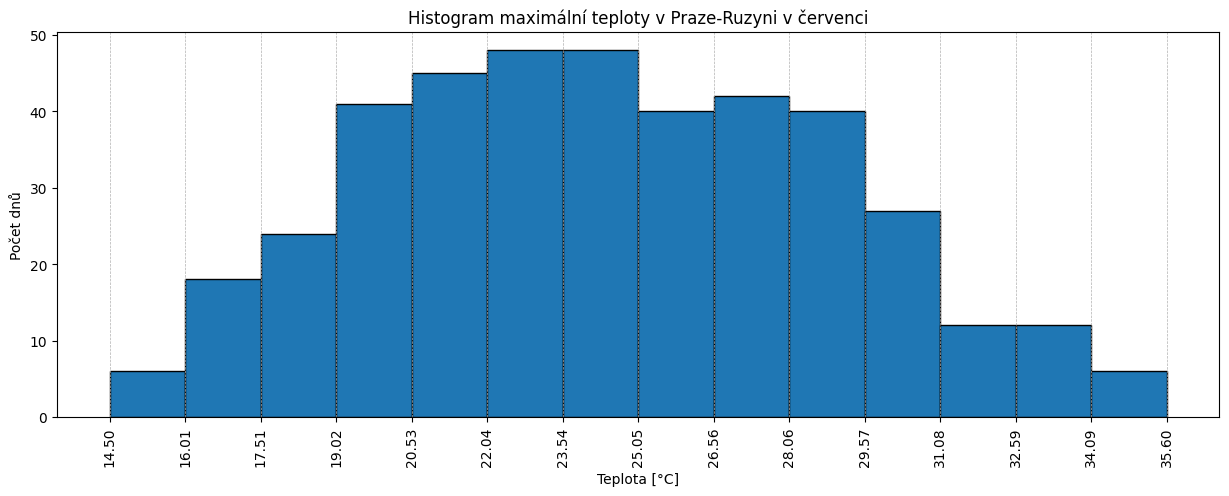

In [10]:
# Import modulů
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Načtení dat
df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv', sep=';')
df['MONTH'] = df['DATE'].apply(lambda x: int(x.split('-')[1]))
df = df[(df['NAME'] == 'RUZYNE') & (df['MONTH'] == 7)]

# Výpočet IQR pro TMAX
iqr = df['TMAX'].quantile(0.75) - df['TMAX'].quantile(0.25)

# Výpočet velikosti vzorku
n = len(df['TMAX'])

# Výpočet šířky bindu dle Freedman-Diaconisova pravidla
bin_width = 2 * (iqr / (n ** (1/3)))

# Výpočet počtu bindů a jejich hranic
data_range = df['TMAX'].max() - df['TMAX'].min()
num_bins = int(np.round(data_range / bin_width))
bin_edges = np.linspace(df['TMAX'].min(), df['TMAX'].max(), num_bins + 1)

# Plot histogram
plt.figure(figsize=(15, 5))
plt.hist(df['TMAX'], bins=bin_edges, edgecolor='black')

# Definice vlastních hodnot na ose x
plt.xticks(bin_edges)

# Nastavení titulku a popisků os
plt.title('Histogram maximální teploty v Praze-Ruzyni v červenci')
plt.xlabel('Teplota [°C]')
plt.ylabel('Počet dnů')

# Otočení popisků na ose x o 90°
plt.xticks(rotation=90)

# Nastavení mřížky na ose x
plt.grid(axis='x', which='major', linestyle='--', linewidth=0.5)

# Zobrazení grafu
plt.show()



### Boxplot
- Zobrazuje rozdělení datové sady pomocí pětičíselného souhrnu: minimum, první kvartil, medián (resp. 2. kvartil), třetí kvartil a maximum.
- Je vhodný zejména pro srovnání rozdělení mezi několika skupinami.
- Umožňuje identifikovat extrémní hodnoty a odhalovat a analyzovat vrcholy a asimetrie v datech.

- Části boxplotu:

  - Centrální Krabice: Krabice zobrazuje mezíkvartilový rozsah (IQR), který je rozdílem mezi třetím a prvním kvartilem (Q3 - Q1). Toto je rozsah středních 50% dat.

  - Medián: Linie uvnitř krabice označuje medián dat, což je hodnota, která dělí datovou sadu na dvě stejně velké poloviny.

  - Vousy (Whiskers): 'Vousy' grafu sahají od prvního kvartilu k nejnižší hodnotě, která není odlehlou hodnotou, a od třetího kvartilu k nejvyšší hodnotě, která není odlehlou hodnotou, v rámci 1.5 IQR od prvního/třetího kvartilu. Data mimo tento rozsah jsou považována za odlehlé hodnoty (outliers).

  - Odlehlé Hodnoty (Outliers): Jednotlivé body, které leží mimo 'vousy', reprezentují odlehlé hodnoty, které mohou být pro analýzu zvláště zajímavé.


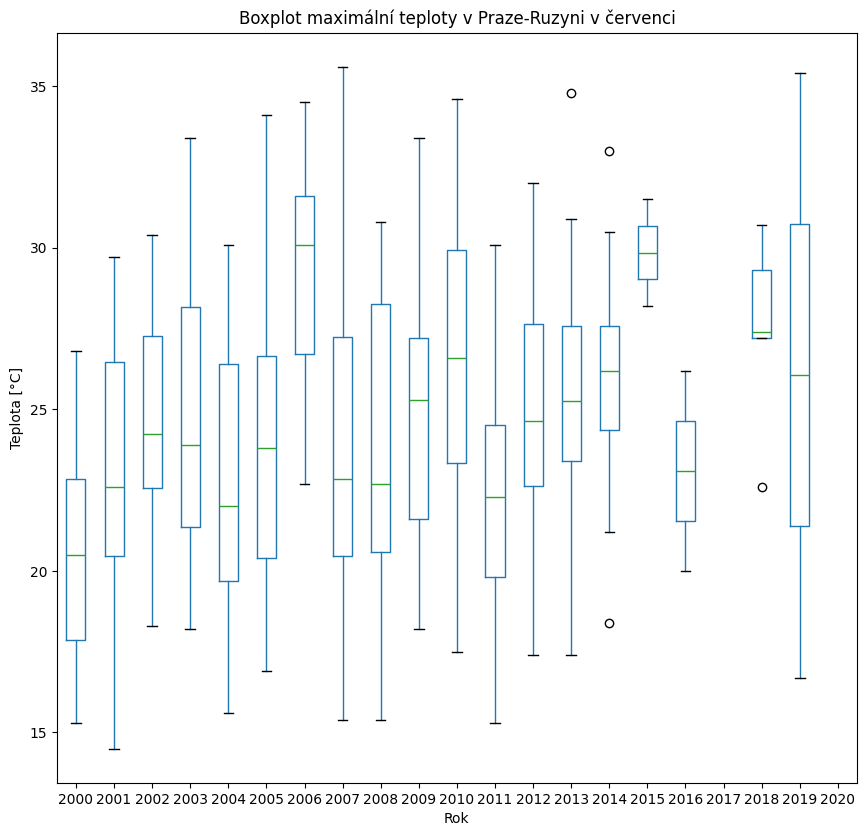

In [1]:
# Import modulů
import pandas as pd
from matplotlib import pyplot as plt

# Načtení dat
df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv', sep=';')
df['DATE'] = pd.to_datetime(df['DATE'])
# výpočet měsíce datumu

df['MONTH'] = df['DATE'].dt.month
df['YEAR'] = df['DATE'].dt.year
df = df[(df['NAME'] == 'RUZYNE') & (df['MONTH'] == 7)]

# Definice hodnot pro boxplot
df.boxplot(column='TMAX', by='YEAR',figsize=(10,10))

# Nastavení titulku a popisků os

# Vypnutí automatického nadpisu
plt.suptitle('')

# Nastavení vlastního nadpisu
plt.title('Boxplot maximální teploty v Praze-Ruzyni v červenci')

plt.xlabel('Rok')
plt.ylabel('Teplota [°C]')

# Vypnutí mřížky
plt.grid(False)

# Zobrazení grafu
plt.show()



## Houslový graf (violin plot)

- Kombinuje prvky boxplotu a odhad hustoty pravděpodobnosti (KDE). Centrální krabice poskytuje informace podobné boxplotu, zatímco křivky KDE na obou stranách krabice zobrazují rozložení dat.
- Šířka violy v jakémkoliv bodě vertikální osy odpovídá odhadu hustoty pravděpodobnosti hodnot v daném bodě. Tímto způsobem graf ilustruje, kde jsou data nejčastější, přičemž širší části violy značí vyšší hustotu pravděpodobnosti.
- Je vhodný pro vizualizaci a porovnávání distribucí mezi různými skupinami nebo kategoriemi, což umožňuje snadné identifikování rozdílů ve variabilitě a symetrii distribucí.



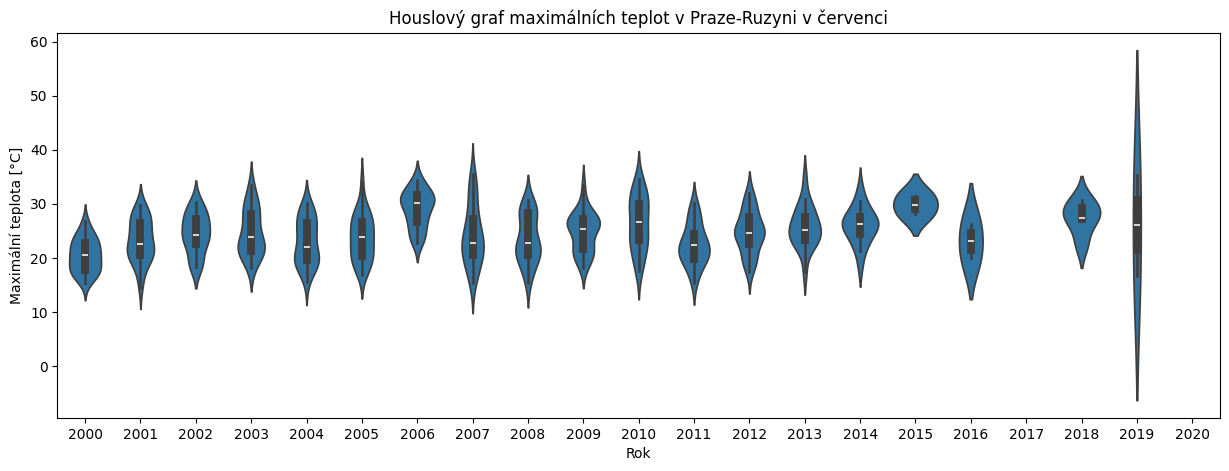

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Načtení dat
df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv', sep=';')
df['DATE'] = pd.to_datetime(df['DATE'])

# Přidání sloupců pro měsíc a rok
df['MONTH'] = df['DATE'].dt.month
df['YEAR'] = df['DATE'].dt.year

# Filtrace dat pro RUZYNE a červenec
df = df[(df['NAME'] == 'RUZYNE') & (df['MONTH'] == 7)]

# Vytvoření houslového grafu
plt.figure(figsize=(15,5))
sns.violinplot(x='YEAR', y='TMAX', data=df)

# Nastavení popisků a titulku
plt.title('Houslový graf maximálních teplot v Praze-Ruzyni v červenci')
plt.xlabel('Rok')
plt.ylabel('Maximální teplota [°C]')

# Zobrazení grafu
plt.show()


### Hřebenový graf (Ridgeline plot)

- Používá primárně k jednoduchému srovnání distribuce dat mezi různými skupinami nebo kategoriemi.
- Každý "hřeben" v grafu reprezentuje rozdělení hodnot proměnné pro určitou skupinu či kategorii, přičemž každý je zobrazen jako odhad hustoty pravděpodobnosti.
- Je užitečný pro srovnání několika distribucí, protože poskytuje čistý a srozumitelný vizuální přehled.




c:\Users\petrrozkosny\AppData\Local\Programs\Python\Python311\Lib\site-packages\joypy\joyplot.py:238: UserWarning: At least a column/group has no numeric values.
  warn("At least a column/group has no numeric values.")


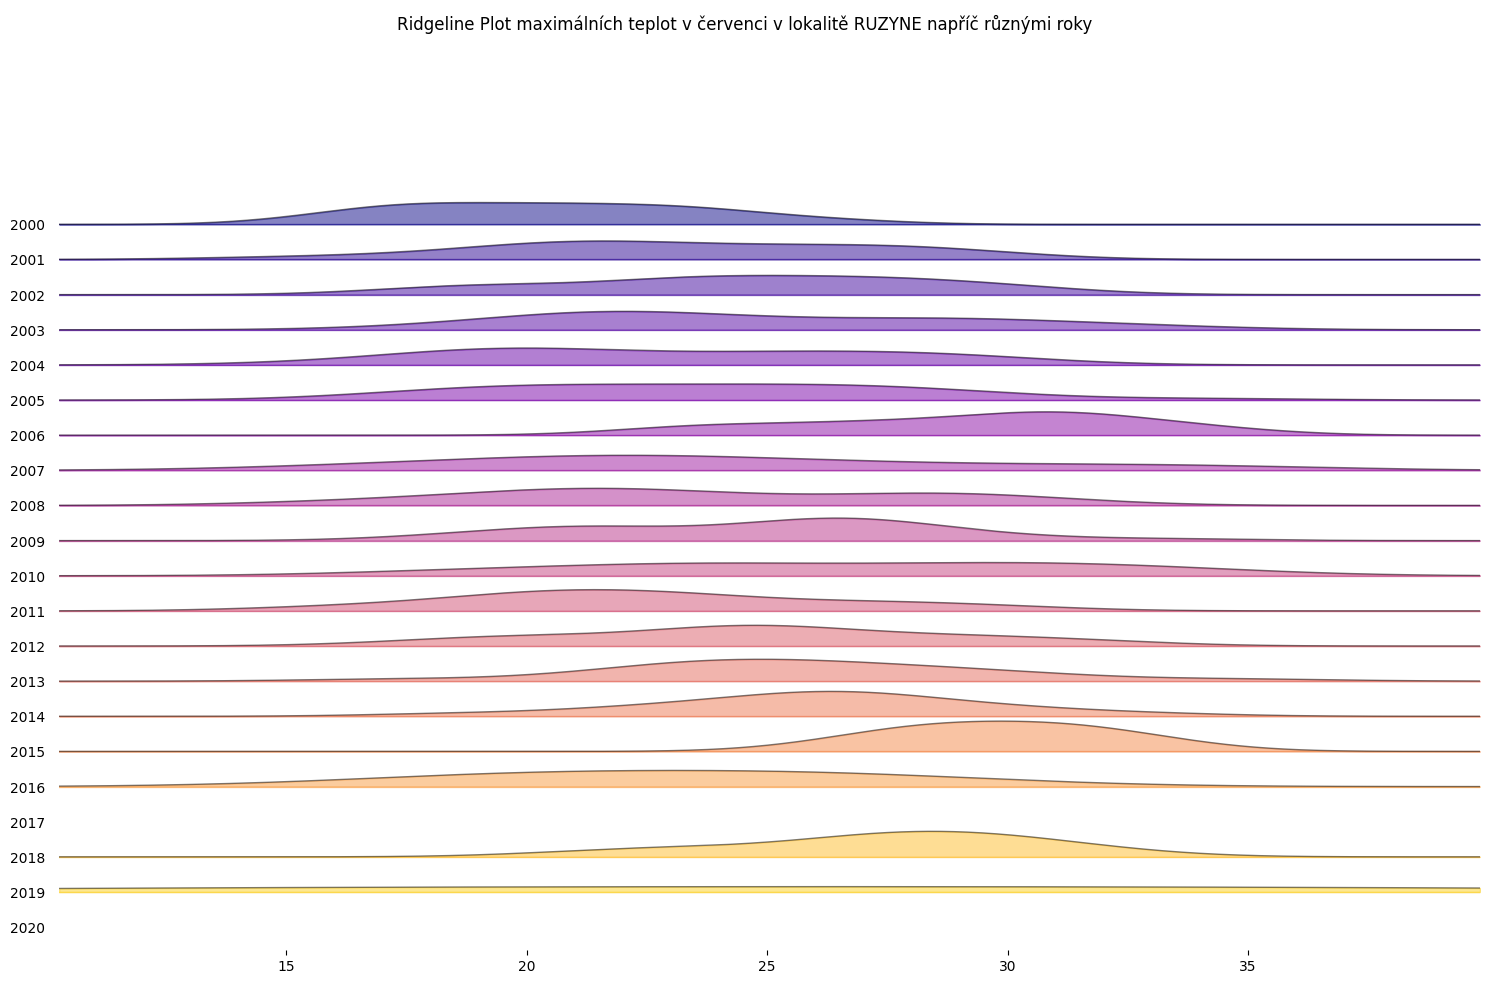

In [3]:
import pandas as pd
from joypy import joyplot
from matplotlib import cm
from matplotlib import pyplot as plt

# Načtení dat
df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv', sep=';')
df['DATE'] = pd.to_datetime(df['DATE'])
df['MONTH'] = df['DATE'].dt.month
df['YEAR'] = df['DATE'].dt.year
df = df[(df['NAME'] == 'RUZYNE') & (df['MONTH'] == 7)]

# Vytvoření Ridgeline plotu pro TMAX v červenci v lokalitě RUZYNE napříč různými roky
fig, axes = joyplot(
    df, by='YEAR', column='TMAX', colormap=cm.plasma, figsize=(15, 10), overlap=3, alpha=0.5, linewidth=1)

# Přidání titulku
plt.suptitle('Ridgeline Plot maximálních teplot v červenci v lokalitě RUZYNE napříč různými roky')

# Zobrazení grafu
plt.show()
